In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn import tree
from sklearn.model_selection import train_test_split
import graphviz as gv
from graphviz import Source
from sklearn import tree
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24
#Source( tree.export_graphviz(dtreg, out_file=None, feature_names=X.columns))

In [2]:
test_data = pd.read_csv(os.path.join('../data', 'cleanLoanDataValidationAllIncome.csv'))
test_data['LogTotalIncome']=np.log(test_data['TotalIncome'])
pd.set_option('display.max_columns', None)
test_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LogTotalIncome
0,0,1,0,1,0,5720.0,0.0,110000.0,360.0,1,2,5720.0,8.651724
1,0,1,1,1,0,3076.0,1500.0,126000.0,360.0,1,2,4576.0,8.428581
2,0,1,2,1,0,5000.0,1800.0,208000.0,360.0,1,2,6800.0,8.824678
3,0,1,2,1,0,2340.0,2546.0,100000.0,360.0,0,2,4886.0,8.494129
4,0,0,0,0,0,3276.0,0.0,78000.0,360.0,1,2,3276.0,8.094378
...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,0,1,3,0,1,4009.0,1777.0,113000.0,360.0,1,2,5786.0,8.663196
341,0,1,0,1,0,4158.0,709.0,115000.0,360.0,1,2,4867.0,8.490233
342,0,0,0,1,0,3250.0,1993.0,126000.0,360.0,0,1,5243.0,8.564649
343,0,1,0,1,0,5000.0,2393.0,158000.0,360.0,1,0,7393.0,8.908289


In [3]:
train_data = pd.read_csv(os.path.join('../data', 'cleanLoanDataTrainAllIncome.csv'))
train_data['LogTotalIncome']=np.log(train_data['TotalIncome'])
pd.set_option('display.max_columns', None)
train_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LogTotalIncome
0,0,1,1,1,0,4583.0,1508.0,128000.0,360.0,1,0,0,6091.0,8.714568
1,0,1,0,1,1,3000.0,0.0,66000.0,360.0,1,2,1,3000.0,8.006368
2,0,1,0,0,0,2583.0,2358.0,120000.0,360.0,1,2,1,4941.0,8.505323
3,0,0,0,1,0,6000.0,0.0,141000.0,360.0,1,2,1,6000.0,8.699515
4,0,1,2,1,1,5417.0,4196.0,267000.0,360.0,1,2,1,9613.0,9.170872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,1,0,0,1,0,2900.0,0.0,71000.0,360.0,1,0,1,2900.0,7.972466
559,0,1,3,1,0,4106.0,0.0,40000.0,180.0,1,0,1,4106.0,8.320205
560,0,1,1,1,0,8072.0,240.0,253000.0,360.0,1,2,1,8312.0,9.025456
561,0,1,2,1,0,7583.0,0.0,187000.0,360.0,1,2,1,7583.0,8.933664


## 1a. random_state = 57, n_estimators = 200, Combined income

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status", "ApplicantIncome", "CoapplicantIncome", "LogTotalIncome"], axis=1)
feature_names = data.columns

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [7]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  1.0
Training score with oob sampling:  0.7559241706161137
Test score:  0.7375886524822695


In [8]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.26878977983659846, 'TotalIncome'),
 (0.24611248082266854, 'LoanAmount'),
 (0.193301451529771, 'Credit_History'),
 (0.06017517169902755, 'Property_Area'),
 (0.06017377046033594, 'Dependents'),
 (0.059154328730650796, 'Loan_Amount_Term'),
 (0.02982278736476434, 'Education'),
 (0.02802214074054317, 'Self_Employed'),
 (0.02760698305155319, 'Gender'),
 (0.026841105764087, 'Married')]

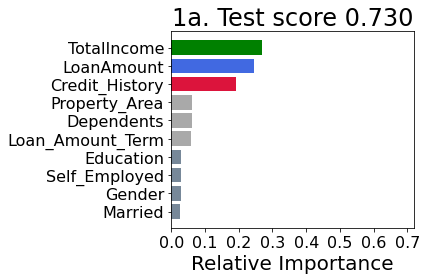

In [9]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 10
colors[9] = 'green'
colors[8] = 'royalblue'
colors[7] = 'crimson'
colors[6] = 'darkgray'
colors[5] = 'darkgray'
colors[4] = 'darkgray'
#colors[6] = 'goldenrod'
#colors[5] = 'darkorchid'#dep
#colors[4] = 'darkturquoise'#mar
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.title('1a. Test score 0.730', fontsize=BIGGER_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_1a.png')
plt.show()

## 1b: random_state = 57, n_estimators = 200, Applicant and co-applicant income separate

In [10]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status", "TotalIncome", "LogTotalIncome"], axis=1)
feature_names = data.columns

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [12]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  1.0
Training score with oob sampling:  0.7393364928909952
Test score:  0.7304964539007093


In [13]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.2114813557613455, 'ApplicantIncome'),
 (0.2067179315440097, 'LoanAmount'),
 (0.18052382226353944, 'Credit_History'),
 (0.12829231061640858, 'CoapplicantIncome'),
 (0.060031764620346255, 'Loan_Amount_Term'),
 (0.05403285383661769, 'Property_Area'),
 (0.05353015774983223, 'Dependents'),
 (0.028736607379221613, 'Education'),
 (0.027662441269305532, 'Gender'),
 (0.026804116600544173, 'Married'),
 (0.02218663835882927, 'Self_Employed')]

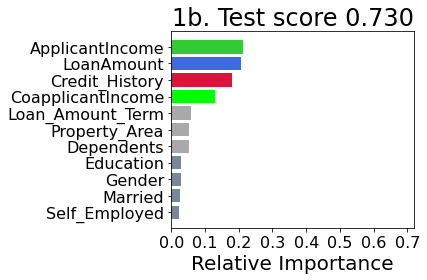

In [14]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 11
colors[10] = 'limegreen'
colors[9] = 'royalblue'
colors[8] = 'crimson'
colors[7] = 'lime'
colors[6] = 'darkgray'
colors[5] = 'darkgray'
colors[4] = 'darkgray'
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.title('1b. Test score 0.730', fontsize=BIGGER_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_1b.png')
plt.show()

## 1c: random_state = 57, n_estimators = 200, log(TotalIncome)

In [15]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status", "TotalIncome", "ApplicantIncome", "CoapplicantIncome"], axis=1)
feature_names = data.columns

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [17]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  1.0
Training score with oob sampling:  0.7511848341232228
Test score:  0.7163120567375887


In [18]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.26911804958091345, 'LogTotalIncome'),
 (0.2490068576434262, 'LoanAmount'),
 (0.18974389491903712, 'Credit_History'),
 (0.06386779023578949, 'Property_Area'),
 (0.05786901842896507, 'Dependents'),
 (0.05723356610758862, 'Loan_Amount_Term'),
 (0.029577273015433142, 'Married'),
 (0.029473176028359086, 'Education'),
 (0.027494094816708278, 'Self_Employed'),
 (0.026616279223779463, 'Gender')]

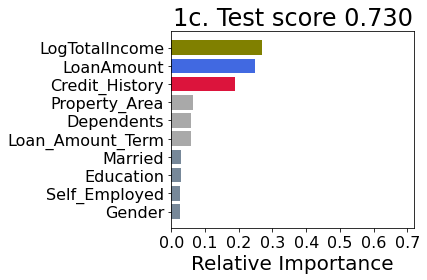

In [19]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 10
colors[9] = 'olive'
colors[8] = 'royalblue'
colors[7] = 'crimson'
colors[6] = 'darkgray'
colors[5] = 'darkgray'
colors[4] = 'darkgray'
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.title('1c. Test score 0.730', fontsize=BIGGER_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_1c.png')
plt.show()

## 2a: take out Loan_Amount_Term, random_state = 57, n_estimators = 200, Combined income

In [20]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status",'Loan_Amount_Term', "ApplicantIncome", "CoapplicantIncome", "LogTotalIncome"], axis=1)
feature_names = data.columns

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [22]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  1.0
Training score with oob sampling:  0.7488151658767772
Test score:  0.7375886524822695


In [23]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.2899963246364806, 'TotalIncome'),
 (0.27650975166515745, 'LoanAmount'),
 (0.19086043709184639, 'Credit_History'),
 (0.06229394079009602, 'Dependents'),
 (0.06180861104423786, 'Property_Area'),
 (0.032360988398975436, 'Education'),
 (0.02998865553599113, 'Married'),
 (0.02846615182345459, 'Self_Employed'),
 (0.02771513901376042, 'Gender')]

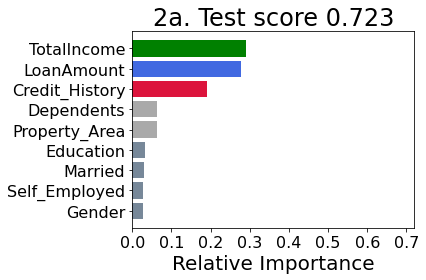

In [24]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 9
colors[8] = 'green'
colors[7] = 'royalblue'
colors[6] = 'crimson'
colors[5] = 'darkgray'
colors[4] = 'darkgray'
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.title('2a. Test score 0.723', fontsize=BIGGER_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_2a.png')
plt.show()

## 2b: take out Loan_Amount_Term, random_state = 57, n_estimators = 200, Applicant and co-applicant income separate

In [25]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status",'Loan_Amount_Term', "TotalIncome", "LogTotalIncome"], axis=1)
feature_names = data.columns

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [27]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  1.0
Training score with oob sampling:  0.7274881516587678
Test score:  0.6950354609929078


In [28]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.22572991704019618, 'LoanAmount'),
 (0.22133845933581725, 'ApplicantIncome'),
 (0.18966776891273665, 'Credit_History'),
 (0.13809525807515854, 'CoapplicantIncome'),
 (0.05611028565574212, 'Property_Area'),
 (0.054732127145811396, 'Dependents'),
 (0.032461052275111466, 'Education'),
 (0.030434450754892428, 'Married'),
 (0.027780960641166967, 'Gender'),
 (0.023649720163366868, 'Self_Employed')]

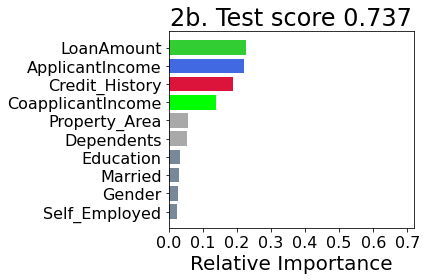

In [29]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 10
colors[9] = 'limegreen'
colors[8] = 'royalblue'
colors[7] = 'crimson'
colors[6] = 'lime'
colors[5] = 'darkgray'
colors[4] = 'darkgray'
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.title('2b. Test score 0.737', fontsize=BIGGER_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_2b.png')
plt.show()

## 2c: take out Loan_Amount_Term, random_state = 57, n_estimators = 200, log(TotalIncome)

In [30]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status",'Loan_Amount_Term', "TotalIncome", "ApplicantIncome", "CoapplicantIncome"], axis=1)
feature_names = data.columns

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [32]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  1.0
Training score with oob sampling:  0.7393364928909952
Test score:  0.723404255319149


In [33]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.2895999784128534, 'LogTotalIncome'),
 (0.2712923947303534, 'LoanAmount'),
 (0.18998519529592278, 'Credit_History'),
 (0.06408802514165192, 'Property_Area'),
 (0.06057183456242227, 'Dependents'),
 (0.03295311086452867, 'Education'),
 (0.030970972345580813, 'Married'),
 (0.030387609078867218, 'Self_Employed'),
 (0.03015087956781948, 'Gender')]

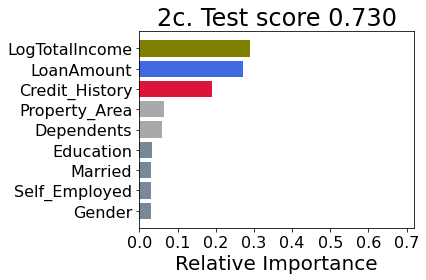

In [34]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 9
colors[8] = 'olive'
colors[7] = 'royalblue'
colors[6] = 'crimson'
colors[5] = 'darkgray'
colors[4] = 'darkgray'

plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.title('2c. Test score 0.730', fontsize=BIGGER_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_2c.png')
plt.show()

## 3a: take out Loan_Amount_Term  and LoanAmount columns, random_state = 57, n_estimators = 200, Combined income

In [35]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status", 'LoanAmount', 'Loan_Amount_Term',"ApplicantIncome", "CoapplicantIncome", "LogTotalIncome"], axis=1)
feature_names = data.columns

In [36]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [37]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  0.995260663507109
Training score with oob sampling:  0.7109004739336493
Test score:  0.6879432624113475


In [38]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.5009903791672066, 'TotalIncome'),
 (0.2018091206276298, 'Credit_History'),
 (0.0878022174712349, 'Dependents'),
 (0.07782288496101622, 'Property_Area'),
 (0.03576228883920166, 'Education'),
 (0.03291168509743024, 'Married'),
 (0.03231888485397689, 'Self_Employed'),
 (0.030582538982303734, 'Gender')]

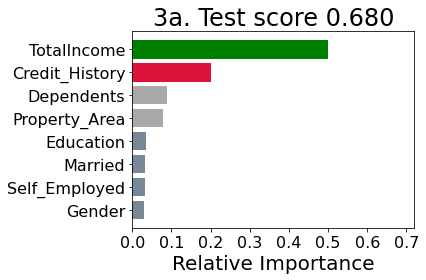

In [39]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 8
colors[7] = 'green'
colors[6] = 'crimson'
colors[5] = 'darkgray'
colors[4] = 'darkgray'
plt.title('3a. Test score 0.680', fontsize=BIGGER_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_3a.png')
plt.show()



## 3b: take out Loan_Amount_Term  and LoanAmount columns, random_state = 57, n_estimators = 200, Applicant and co-applicant income separate

In [40]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status", 'LoanAmount', 'Loan_Amount_Term',"TotalIncome", "LogTotalIncome"], axis=1)
feature_names = data.columns

In [41]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [42]:
 # Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  0.995260663507109
Training score with oob sampling:  0.7014218009478673
Test score:  0.7021276595744681


In [43]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.34309151443861347, 'ApplicantIncome'),
 (0.20233838352104389, 'Credit_History'),
 (0.17970225799562115, 'CoapplicantIncome'),
 (0.07276909692245769, 'Dependents'),
 (0.07058160783345689, 'Property_Area'),
 (0.03583941063501846, 'Married'),
 (0.03421852281365887, 'Education'),
 (0.03167334594744419, 'Gender'),
 (0.02978585989268554, 'Self_Employed')]

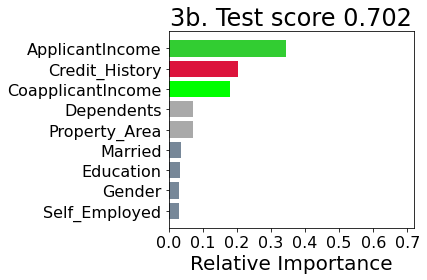

In [44]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 9
colors[8] = 'limegreen'
colors[7] = 'crimson'
colors[6] = 'lime'
colors[5] = 'darkgray'
colors[4] = 'darkgray'
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.title('3b. Test score 0.702', fontsize=BIGGER_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_3b.png')
plt.show()



## 3c: take out Loan_Amount_Term  and LoanAmount columns, random_state = 57, n_estimators = 200, log(TotalIncome)

In [45]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status", 'LoanAmount', 'Loan_Amount_Term',"TotalIncome", "ApplicantIncome", "CoapplicantIncome"], axis=1)
feature_names = data.columns

In [46]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [47]:
 # Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  0.995260663507109
Training score with oob sampling:  0.7014218009478673
Test score:  0.6666666666666666


In [48]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.5058978194200479, 'LogTotalIncome'),
 (0.1981700257828822, 'Credit_History'),
 (0.08485079098765895, 'Dependents'),
 (0.07909898872665673, 'Property_Area'),
 (0.03542828054599066, 'Education'),
 (0.03360202994811961, 'Married'),
 (0.03303560753151015, 'Gender'),
 (0.02991645705713366, 'Self_Employed')]

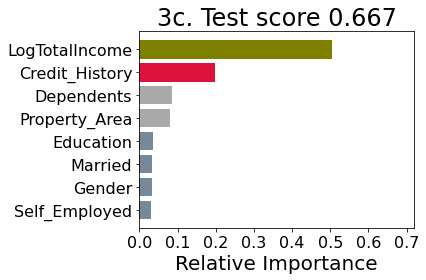

In [49]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 8
colors[7] = 'olive'
colors[6] = 'crimson'
colors[5] = 'darkgray'
colors[4] = 'darkgray'
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.title('3c. Test score 0.667', fontsize=BIGGER_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_3c.png')
plt.show()

## 4a: , random_state = 57, n_estimators = 200, take out Loan_Amount_Term and LoanAmount columns, also remove columns with lower importance in previous runs ( 'Gender', 'Education', 'Self_Employed', 'Married') - Combined incomes

In [50]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status",'LoanAmount', 'Loan_Amount_Term', 'Gender', 'Education', 'Self_Employed', 'Married', "ApplicantIncome", "CoapplicantIncome", "LogTotalIncome" ], axis=1)
feature_names = data.columns

In [51]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [52]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  0.995260663507109
Training score with oob sampling:  0.6753554502369669
Test score:  0.6808510638297872


In [53]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.6629246050303119, 'TotalIncome'),
 (0.20778071950427265, 'Credit_History'),
 (0.0711409694540075, 'Dependents'),
 (0.058153706011407916, 'Property_Area')]

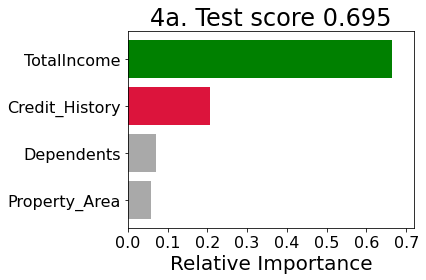

In [54]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 4
colors[3] = 'green'
colors[2] = 'crimson'
colors[1] = 'darkgray'
colors[0] = 'darkgray'
plt.title('4a. Test score 0.695', fontsize=BIGGER_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_4a.png')
plt.show()



## 4b: , random_state = 57, n_estimators = 200, take out Loan_Amount_Term and LoanAmount columns, also remove columns with lower importance in previous runs ( 'Gender', 'Education', 'Self_Employed', 'Married') - Applicant and co-applicant income separate

In [55]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status",'LoanAmount', 'Loan_Amount_Term', 'Gender', 'Education', 'Self_Employed', 'Married', "TotalIncome", "LogTotalIncome"], axis=1)
feature_names = data.columns

In [56]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [57]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  0.995260663507109
Training score with oob sampling:  0.6919431279620853
Test score:  0.7163120567375887


In [58]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.45163381653759566, 'ApplicantIncome'),
 (0.21488865484539177, 'CoapplicantIncome'),
 (0.2086962286512012, 'Credit_History'),
 (0.06645923753290546, 'Dependents'),
 (0.05832206243290593, 'Property_Area')]

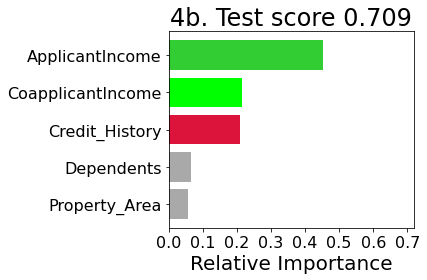

In [59]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 5
colors[4] = 'limegreen'
colors[3] = 'lime'
colors[2] = 'crimson'
colors[1] = 'darkgray'
colors[0] = 'darkgray'
plt.title('4b. Test score 0.709', fontsize=BIGGER_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_4b.png')
plt.show()


## 4c:  random_state = 57, n_estimators = 200, take out Loan_Amount_Term and LoanAmount columns, also remove columns with lower importance in previous runs ( 'Gender', 'Education', 'Self_Employed', 'Married') - Log(TotalIncome)

In [60]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status",'LoanAmount', 'Loan_Amount_Term', 'Gender', 'Education', 'Self_Employed', 'Married', "TotalIncome",  "ApplicantIncome", "CoapplicantIncome"], axis=1)
feature_names = data.columns

In [61]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [62]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  0.995260663507109
Training score with oob sampling:  0.6635071090047393
Test score:  0.6737588652482269


In [63]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.6647458489494903, 'LogTotalIncome'),
 (0.2084501659036581, 'Credit_History'),
 (0.06594170068741939, 'Dependents'),
 (0.060862284459432134, 'Property_Area')]

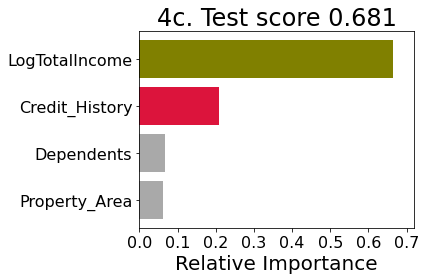

In [64]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 4
colors[3] = 'olive'
colors[2] = 'crimson'
colors[1] = 'darkgray'
colors[0] = 'darkgray'
plt.title('4c. Test score 0.681', fontsize=BIGGER_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_4c.png')
plt.show()
